The dataset contains some comments that customers describe their experience with a restaurant. Some comments are positive and some are negative. We will build a model with NLP algorithm to classify new comments to know whether they are positive or negative.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
comments = pd.read_csv("https://bilkav.com/Restaurant_Reviews.csv", error_bad_lines=False)
#we have to set the parameter error_bad_lines to 'False' because some comments contain ',' and pandas assumes there are 
#three or more columns but the dataset has two. This way, pandas has skipped these lines.

b'Skipping line 15: expected 2 fields, saw 4\nSkipping line 20: expected 2 fields, saw 3\nSkipping line 23: expected 2 fields, saw 3\nSkipping line 29: expected 2 fields, saw 3\nSkipping line 30: expected 2 fields, saw 3\nSkipping line 32: expected 2 fields, saw 4\nSkipping line 35: expected 2 fields, saw 3\nSkipping line 36: expected 2 fields, saw 3\nSkipping line 39: expected 2 fields, saw 3\nSkipping line 45: expected 2 fields, saw 3\nSkipping line 46: expected 2 fields, saw 3\nSkipping line 49: expected 2 fields, saw 3\nSkipping line 51: expected 2 fields, saw 3\nSkipping line 55: expected 2 fields, saw 3\nSkipping line 57: expected 2 fields, saw 4\nSkipping line 60: expected 2 fields, saw 3\nSkipping line 61: expected 2 fields, saw 3\nSkipping line 67: expected 2 fields, saw 3\nSkipping line 72: expected 2 fields, saw 3\nSkipping line 75: expected 2 fields, saw 3\nSkipping line 76: expected 2 fields, saw 4\nSkipping line 92: expected 2 fields, saw 3\nSkipping line 93: expected 2 f

In [45]:
comments.head()

,Review,Liked
0,Wow... Loved this place.,1.0
1,Crust is not good.,0.0
2,Not tasty and the texture was just nasty.,0.0
3,Stopped by during the late May bank holiday of...,1.0
4,The selection on the menu was great and so wer...,1.0


As we can see, the dataset has two columns, 'Review' and 'Liked'. In 'Liked' column, 1 means positive, and 0 means negative.

The actual data is in the 'Review' column. These are the comments written by customers. The problem in these data, comments contains some punctuation marks. First, we have to divide sentences into words, and if there is a punctuation mark adjacent to the word we need to remove it. We will use regular expression method to solve this problem.

In [46]:
comments = comments.dropna()

In [47]:
len(comments) #there are 704 comments left in the dataset

704

In [48]:
import re 

Firstly, we will try to clean only one comment to be able to understand the process.

In [49]:
review = comments["Review"][0]

In [50]:
review

'Wow... Loved this place.'

Now we will use re.sub method to put spaces instead of punctuation.

In [51]:
review = re.sub("[^a-zA-Z]"," ",review)

In [52]:
review

'Wow    Loved this place '

As you can see the punctation marks deleted. Now we have to lower characters to work with sentences easily.

In [53]:
review = review.lower()

In [54]:
review

'wow    loved this place '

We have cleaned the sentence and lowered the characters. Now we have to create a list that contains words to be able to get rid of extra spaces.

In [55]:
review = review.split()

In [56]:
review

['wow', 'loved', 'this', 'place']

Now we have to delete stopwords in the sentences because they do not describe any feelings and can be problem while fitting the model.

In [57]:
import nltk

In [58]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\btskd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
from nltk.stem.porter import PorterStemmer #this package for to get words in their root form

In [60]:
ps = PorterStemmer()

In [61]:
review = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
#if the word is not in the stopwords set, stem the word and then add into the review list.

In [62]:
review

['wow', 'love', 'place']

This is the final form of the review. Now we will create a sentence with these words.

In [63]:
review = ' '.join(review)

In [64]:
review

'wow love place'

Finally we can use this process to clean all reviews in the dataset. 

In [67]:
comments_final = []
for i in comments.index:
    review = re.sub("[^a-zA-Z]"," ",comments["Review"][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
    review = " ".join(review)
    comments_final.append(review)

In [171]:
comments_final[0:10] #for checking the sentences

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

<b>Feature Extraction</b>

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
cv = CountVectorizer(max_features = 2000) #get the most used 2000 words

In [73]:
X = cv.fit_transform(comments_final).toarray() #An array is created in which the 2000 words in the cv are columns and the comments_final list, which consists of the comments we created above, is a row. If a comment contains the word in the column, that part is marked as 1.  

In [74]:
X #independent variable

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [75]:
y = comments["Liked"].values

In [76]:
y #dependent variable

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1.

#### Creating the model

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [94]:
from sklearn.neighbors import KNeighborsClassifier

We will use K-Nearest Neighbors method for classification. We create a small test to decide how many neighbors we should use to get the best results.

In [95]:
neighbors_setting = range(1,11) #n_neighbors parameter will have 1 to 10 neighbor(s)
training_accuracy = []
test_accuracy = []

In [96]:
for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

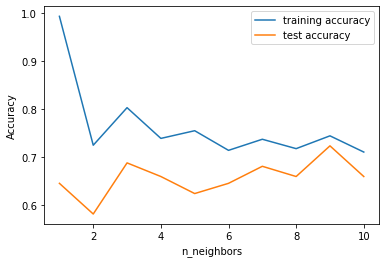

In [97]:
plt.plot(neighbors_setting, training_accuracy, label="training accuracy")
plt.plot(neighbors_setting, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

According to the chart, to be able to get best predictions, the parameter n_neighbors must be 9. Let's try it.

In [164]:
knn = KNeighborsClassifier(n_neighbors=9)

In [165]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [166]:
y_pred = knn.predict(X_test)

In [167]:
from sklearn.metrics import confusion_matrix

In [168]:
cm = confusion_matrix(y_test, y_pred)

In [169]:
cm

array([[63, 10],
       [29, 39]], dtype=int64)